In [1]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [2]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [3]:
config = ConfigLoader.get_config()

In [4]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

In [5]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN)
]

In [6]:
from simple_statistics import yearwise_documents
mult_years = []
mult_counts = []
filtered_corpora = []
for corpus in corpora:
    corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=["fckw", "cfc"])
    filtered_corpora.append(corpus)
    import time
    print(f"{corpus.name}: {len(corpus.get_documents())} documents ({', '.join([str(y) for y in corpus.get_years()])})")
    time.sleep(1)
    
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=100))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)


Filtering 'bundestag' corpus : 100%|████████████████████████████████████████████████████| 877973/877973 [00:26<00:00, 33129.43it/s]


bundestag: 298 documents (1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019)


Filtering 'abstract' corpus : 100%|█████████████████████████████████████████████████████| 407961/407961 [00:10<00:00, 39430.23it/s]


abstract: 905 documents (1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████| 221034/221034 [00:05<00:00, 37561.67it/s]


sustainability: 96 documents (2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


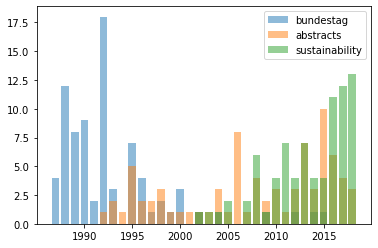

In [7]:
mult_counts = []
mult_years = []
for corpus in filtered_corpora:
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=80))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

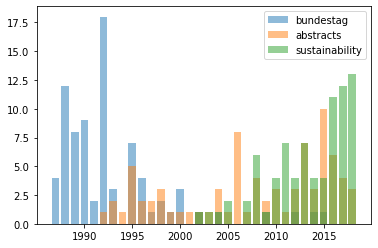

In [8]:
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

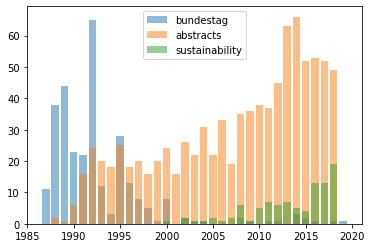

In [15]:
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

In [9]:
# extract keywords from documents in corpus and assign keywords to documents
sampled_corpora = [corpus.sample(10) for corpus in filtered_corpora]
for corpus in sampled_corpora:
    KeyPhraseExtractor.rake(corpus=corpus.sample(10))

Assign keywords to documents: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19982.39it/s]


In [ ]:
for corpus in sampled_corpora[-1:]:
    corpus.translate_keywords(restrict_per_document=2)

sampled_corpora[2].get_documents()[0].keywords

en 	 reduce greenhouse gas emission 			 Treibhausgasemissionen reduzieren
en 	 household carbon dioxide emission 			 Haushaltskohlendioxidemission
en 	 estimate carbon emission cause 			 Schätzung Kohlenstoff-Emission bewirken
en 	 write mainly base 			 schreibt in erster Linie Basis
en 	 much recent literature 			 viel neuere Literatur
en 	 examine different type 			 untersuchen unterschiedliche Art
en 	 solve air quality problem 			 Luftqualitätsproblem lösen
en 	 much environmentally sustainable manner 			 viel umweltverträgliche Art und Weise


In [30]:
kwt = KeywordTranslator()
for corpus in sampled_corpora:
    for d in corpus.get_documents():
        print(d.text[:100], '...\n  keywords:')
        for kw in d.keywords:
            print('    - \"'+str(kw)+'\"')
        print('\n')

Dann rufe ich Frage 26 der Kollege Erler auf : welch Maßnahme haben der Bundesregierung ergreifen be ...
  keywords:
    - "deutsch rüstungsindustrie einschränken)"
    - "bundesregierung ergreifen beziehungsweise)"
    - "welch maßnahme)"
    - "kollege erler)"
    - "frage 26)"
    - "ergreifen)"
    - "stoff)"
    - "rufe)"
    - "gänzlich)"
    - "fckw)"
    - "ersetzen)"
    - "einsatz)"
    - "bundeswehr)"
    - "bitte)"


Herr Präsident ! Meine sehr verehren Dame und Herr ! Bei der Bewertung der Umweltrelevanz der FCKW g ...
  keywords:
    - "abgeordnete müller gekennzeichnet fortentwicklung)"
    - "26 000 tonne immerhin)"
    - "bundesrepublik deutschland politik betreiben)"
    - "bundesrepublik deutschland heraus verwirklichen)"
    - "ta luft entsprechen ändern)"
    - "gerade beim klimaeffekt erkennen)"
    - "international multiplikative wirkung auslösen)"
    - "darauf aufbauen weit anstreben)"
    - "3 000 tonne fckw)"
    - "problematisch stoff hinterherjagen muß)"
  

In [ ]:
from typing import Dict, List
from collections import Counter

In [ ]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [ ]:
print(key_word_count(rake_keywords))